<a href="https://colab.research.google.com/github/AmnNrz/llm-extension-training/blob/main/pesticide_efficacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("googledrive")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(googledrive)
library(readr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# Infection file
inf_id <- "1l_9gelDa1RRhbji8Ef63Tvoc5y0b3NKg"
drive_download(as_id(inf_id), path = "infection.csv", overwrite = TRUE)

# Environmental data (d)
env_d_id <- "11vc2Tz5YBj457x9mzCgnhBoTsnOcerOY"
drive_download(as_id(env_d_id), path = "environmental_d.csv", overwrite = TRUE)

# Environmental data (h)
env_h_id <- "15akr40_ZKuj-WCx-XwIY8EAHBLE_vEga"
drive_download(as_id(env_h_id), path = "environmental_h.csv", overwrite = TRUE)

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=b7f37e6a6a4ce1311199711f5580267c&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVZHelIxQ0dsRVZNZzFxSER1aklXcWVUd0h6NzRPY0RiWnRpZ2FsU2J3LUh0emt4YUJhSnlta0VlR1ZfcEZJYjNnWmd2ZyIsInN0YXRlIjoiYjdmMzdlNmE2YTRjZTEzMTExOTk3MTFmNTU4MDI2N2MifQ==


File downloaded:

• infections.csv <id: 1l_9gelDa1RRhbji8Ef63Tvoc5y0b3NKg>

Saved locally as:

• infection.csv

File downloaded:

• environmental_d.csv <id: 11vc2Tz5YBj457x9mzCgnhBoTsnOcerOY>

Saved locally as:

• environmental_d.csv

File downloaded:

• environmental_h.csv <id: 15akr40_ZKuj-WCx-XwIY8EAHBLE_vEga>

Saved locally as:

• environmental_h.csv



In [4]:
inf_df <- read_csv("infection.csv")
env_d_df <- read_csv("environmental_d.csv")
env_h_df <- read_csv("environmental_h.csv")

Rows: 566 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, variety, location, experiment, trt_code, rep
dbl (7): year, tree_age, clusters, strikes, infection, rel_infection, rel_co...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 849 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): state, Date
dbl (16): Year, Day, DayFromInoc, BDD, TRV, Risk, Air_Min_F, Air_Avg_F, Air_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 5447 Columns: 17
── Column specification ─────────────────────────

In [5]:
names(inf_df)

[1] "year"          "state"         "variety"       "location"     
 [5] "experiment"    "tree_age"      "trt_code"      "rep"          
 [9] "clusters"      "strikes"       "infection"     "rel_infection"
[13] "rel_control"

In [6]:
names(env_d_df)

[1] "Year"           "state"          "Date"           "Day"           
 [5] "DayFromInoc"    "BDD"            "TRV"            "Risk"          
 [9] "Air_Min_F"      "Air_Avg_F"      "Air_Max_F"      "WindAvg"       
[13] "WindGust"       "Precip"         "SolarRadiation" "Humidity"      
[17] "LeafWetness"    "UV"

In [7]:
names(env_h_df)

[1] "Year"           "state"          "Date"           "Hour"          
 [5] "Day"            "DayFromInoc"    "TRV"            "Risk"          
 [9] "Air_Min_F"      "Air_Avg_F"      "Air_Max_F"      "WindAvg"       
[13] "WindGust"       "Precip"         "SolarRadiation" "Humidity"      
[17] "LeafWetness"

In [8]:
# Filter environmental data to ±14 days of inoculation
env_d_filtered <- env_d_df %>%
  filter(DayFromInoc >= -14 & DayFromInoc <= 14)


In [9]:
# # Compute environmental summaries for each state–year and inoculation window
# env_summary <- env_d_filtered %>%
#   mutate(
#     window = case_when(
#       DayFromInoc >= -7  & DayFromInoc <= -1  ~ "PRE",
#       DayFromInoc >= 0   & DayFromInoc <= 3   ~ "PERI",
#       DayFromInoc >= 4   & DayFromInoc <= 14  ~ "POST",
#       DayFromInoc >= -14 & DayFromInoc <= 14  ~ "FULL",
#       TRUE ~ NA_character_
#     )
#   ) %>%
#   filter(!is.na(window)) %>%
#   group_by(state, Year, window) %>%
#   summarise(
#     Air_Min_F       = mean(Air_Min_F, na.rm = TRUE),
#     Air_Avg_F       = mean(Air_Avg_F, na.rm = TRUE),
#     Air_Max_F       = mean(Air_Max_F, na.rm = TRUE),
#     WindAvg         = mean(WindAvg, na.rm = TRUE),
#     WindGust        = mean(WindGust, na.rm = TRUE),
#     Precip          = mean(Precip, na.rm = TRUE),
#     SolarRadiation  = mean(SolarRadiation, na.rm = TRUE),
#     Humidity        = mean(Humidity, na.rm = TRUE)
#   ) %>%
#   ungroup() %>%
#   # Pivot wider to have separate columns for each window
#   tidyr::pivot_wider(
#     names_from = window,
#     values_from = c(
#       Air_Min_F, Air_Avg_F, Air_Max_F, WindAvg, WindGust,
#       Precip, SolarRadiation, Humidity
#     ),
#     names_glue = "{.value}_{window}"
#   )


In [10]:
# Define a helper function to compute means for a given window range
summarise_window <- function(df, min_day, max_day, label) {
  df %>%
    filter(DayFromInoc >= min_day & DayFromInoc <= max_day) %>%
    group_by(state, Year) %>%
    summarise(
      Air_Min_F = mean(Air_Min_F, na.rm = TRUE),
      Air_Avg_F = mean(Air_Avg_F, na.rm = TRUE),
      Air_Max_F = mean(Air_Max_F, na.rm = TRUE),
      WindAvg = mean(WindAvg, na.rm = TRUE),
      WindGust = mean(WindGust, na.rm = TRUE),
      Precip = mean(Precip, na.rm = TRUE),
      SolarRadiation = mean(SolarRadiation, na.rm = TRUE),
      Humidity = mean(Humidity, na.rm = TRUE),
      UV = mean(UV, na.rm = TRUE),
      .groups = "drop"
    ) %>%
    rename_with(~ paste0(.x, "_", label), -c(state, Year))
}

# Compute each window separately
env_pre  <- summarise_window(env_d_filtered, -7,  -1,  "PRE")
env_peri <- summarise_window(env_d_filtered,  0,   3,  "PERI")
env_post <- summarise_window(env_d_filtered,  4,  14,  "POST")
env_full <- summarise_window(env_d_filtered, -14, 14,  "FULL")

# Combine them into one summary dataframe
env_summary <- list(env_pre, env_peri, env_post, env_full) %>%
  purrr::reduce(full_join, by = c("state", "Year"))


In [11]:
env_summary

state,Year,Air_Min_F_PRE,Air_Avg_F_PRE,Air_Max_F_PRE,WindAvg_PRE,WindGust_PRE,Precip_PRE,SolarRadiation_PRE,Humidity_PRE,⋯,UV_POST,Air_Min_F_FULL,Air_Avg_F_FULL,Air_Max_F_FULL,WindAvg_FULL,WindGust_FULL,Precip_FULL,SolarRadiation_FULL,Humidity_FULL,UV_FULL
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CA,2022,42.02000,55.98000,69.84000,6.700000,NaN,0.00000000,18.92600,41.184000,⋯,NaN,45.42000,58.70500,73.04500,6.030000,NaN,0.05300000,18.33600,57.87000,NaN
CA,2023,38.30000,49.80000,61.00000,4.850000,NaN,0.00000000,21.12500,NaN,⋯,4.963636,39.15294,49.76471,60.49412,5.447059,NaN,0.09529412,19.52059,NaN,5.400000
MI,2022,49.48571,61.41429,73.28571,7.071429,20.87143,0.01142857,19.39000,51.171429,⋯,3.836364,49.51111,59.65926,69.74444,5.851852,20.20370,0.08851852,15.76963,65.39630,4.644444
MI,2023,43.42857,54.94286,66.98571,NaN,17.42857,0.02142857,NaN,68.342857,⋯,7.109091,42.63448,54.07586,65.60690,NaN,18.95172,0.05172414,NaN,64.75517,5.927586
MI,2024,45.30000,58.38571,70.64286,10.571429,19.42857,0.07142857,437.48667,66.971429,⋯,6.418182,45.25517,56.24828,66.56897,9.065517,17.06897,0.07586207,430.08750,67.35862,5.782759
NC,2022,39.98571,52.71429,65.45714,3.214286,NaN,0.01571429,18.10429,NaN,⋯,7.063636,43.05556,55.70370,68.34444,3.018519,NaN,0.08370370,19.94778,NaN,6.185185
NC,2023,44.44286,56.85714,69.25714,7.257143,15.00000,0.04714286,18.09286,56.038571,⋯,7.100000,42.49310,55.56897,68.62759,5.082759,12.76207,0.14275862,16.65966,65.58483,6.286207
NY,2022,43.61429,57.05714,70.50000,3.885714,NaN,0.00000000,27.11286,52.497143,⋯,4.936364,48.40690,59.16207,69.91379,4.848276,NaN,0.05517241,21.21621,68.53828,5.393103
NY,2023,45.31429,57.38571,69.42857,4.357143,NaN,0.03142857,23.66000,60.800000,⋯,8.290909,43.36207,53.65517,63.93793,5.086207,NaN,0.10896552,19.72724,67.59310,6.551724


In [12]:
# Join infection data with summarized environmental features
inf_env_df <- inf_df %>%
  left_join(env_summary, by = c("state" = "state", "year" = "Year"))


In [13]:
inf_env_df

year,state,variety,location,experiment,tree_age,trt_code,rep,clusters,strikes,⋯,UV_POST,Air_Min_F_FULL,Air_Avg_F_FULL,Air_Max_F_FULL,WindAvg_FULL,WindGust_FULL,Precip_FULL,SolarRadiation_FULL,Humidity_FULL,UV_FULL
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022,CA,Shinko,CAShinko,CAShinko2022,10,Alum,B,5,1,⋯,NaN,45.42,58.705,73.045,6.03,NaN,0.053,18.336,57.87,NaN
2022,CA,Shinko,CAShinko,CAShinko2022,10,Alum,D,37,8,⋯,NaN,45.42,58.705,73.045,6.03,NaN,0.053,18.336,57.87,NaN
2022,CA,Shinko,CAShinko,CAShinko2022,10,Alum,C,60,13,⋯,NaN,45.42,58.705,73.045,6.03,NaN,0.053,18.336,57.87,NaN
2022,CA,Shinko,CAShinko,CAShinko2022,10,Alum,A,70,28,⋯,NaN,45.42,58.705,73.045,6.03,NaN,0.053,18.336,57.87,NaN
2022,CA,Shinko,CAShinko,CAShinko2022,10,BacterioPhage,A,43,10,⋯,NaN,45.42,58.705,73.045,6.03,NaN,0.053,18.336,57.87,NaN
2022,CA,Shinko,CAShinko,CAShinko2022,10,BacterioPhage,C,54,15,⋯,NaN,45.42,58.705,73.045,6.03,NaN,0.053,18.336,57.87,NaN
2022,CA,Shinko,CAShinko,CAShinko2022,10,BacterioPhage,B,30,9,⋯,NaN,45.42,58.705,73.045,6.03,NaN,0.053,18.336,57.87,NaN
2022,CA,Shinko,CAShinko,CAShinko2022,10,BacterioPhage,D,40,13,⋯,NaN,45.42,58.705,73.045,6.03,NaN,0.053,18.336,57.87,NaN
2022,CA,Shinko,CAShinko,CAShinko2022,10,BP,A,68,7,⋯,NaN,45.42,58.705,73.045,6.03,NaN,0.053,18.336,57.87,NaN


In [14]:
names(inf_env_df)

[1] "year"                "state"               "variety"            
 [4] "location"            "experiment"          "tree_age"           
 [7] "trt_code"            "rep"                 "clusters"           
[10] "strikes"             "infection"           "rel_infection"      
[13] "rel_control"         "Air_Min_F_PRE"       "Air_Avg_F_PRE"      
[16] "Air_Max_F_PRE"       "WindAvg_PRE"         "WindGust_PRE"       
[19] "Precip_PRE"          "SolarRadiation_PRE"  "Humidity_PRE"       
[22] "UV_PRE"              "Air_Min_F_PERI"      "Air_Avg_F_PERI"     
[25] "Air_Max_F_PERI"      "WindAvg_PERI"        "WindGust_PERI"      
[28] "Precip_PERI"         "SolarRadiation_PERI" "Humidity_PERI"      
[31] "UV_PERI"             "Air_Min_F_POST"      "Air_Avg_F_POST"     
[34] "Air_Max_F_POST"      "WindAvg_POST"        "WindGust_POST"      
[37] "Precip_POST"         "SolarRadiation_POST" "Humidity_POST"      
[40] "UV_POST"             "Air_Min_F_FULL"      "Air_Avg_F_FULL"     
[43] "Air_Max_F_FULL"      "WindAvg_FULL"        "WindGust_FULL"      
[46] "Precip_FULL"         "SolarRadiation_FULL" "Humidity_FULL"      
[49] "UV_FULL"

In [15]:
# Check for infection records missing environmental matches
sum(is.na(inf_env_df$Air_Min_F_FULL))

[1] 0

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



[[1]]
 [1] "dplyr"       "readr"       "googledrive" "stats"       "graphics"   
 [6] "grDevices"   "utils"       "datasets"    "methods"     "base"       

[[2]]
 [1] "tidyr"       "dplyr"       "readr"       "googledrive" "stats"      
 [6] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[11] "base"       

[[3]]
 [1] "ggplot2"     "tidyr"       "dplyr"       "readr"       "googledrive"
 [6] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[11] "methods"     "base"       

[[4]]
 [1] "corrplot"    "ggplot2"     "tidyr"       "dplyr"       "readr"      
 [6] "googledrive" "stats"       "graphics"    "grDevices"   "utils"      
[11] "datasets"    "methods"     "base"       

[[5]]
 [1] "tibble"      "corrplot"    "ggplot2"     "tidyr"       "dplyr"      
 [6] "readr"       "googledrive" "stats"       "graphics"    "grDevices"  
[11] "utils"       "datasets"    "methods"     "base"

NA counts per predictor (after coercion):
      Air_Min_F_PRE       Air_Avg_F_PRE       Air_Max_F_PRE         WindAvg_PRE 
                  0                   0                   0                  36 
       WindGust_PRE          Precip_PRE  SolarRadiation_PRE        Humidity_PRE 
                221                   0                  36                  61 
             UV_PRE      Air_Min_F_PERI      Air_Avg_F_PERI      Air_Max_F_PERI 
                 38                   0                   0                   0 
       WindAvg_PERI       WindGust_PERI         Precip_PERI SolarRadiation_PERI 
                 36                 221                   0                  36 
      Humidity_PERI             UV_PERI      Air_Min_F_POST      Air_Avg_F_POST 
                 61                  38                   0                   0 
     Air_Max_F_POST        WindAvg_POST       WindGust_POST         Precip_POST 
                  0                  36                 221        

agg_record_1529504049 
                    2

Heatmap written to env_predictors_correlation_heatmap.png
Predictor pairs with |correlation| > 0.8 :
# A tibble: 48 × 3
   var1                var2                 corr
   <chr>               <chr>               <dbl>
 1 SolarRadiation_FULL SolarRadiation_POST 1.000
 2 SolarRadiation_FULL SolarRadiation_PRE  1.000
 3 SolarRadiation_POST SolarRadiation_PRE  1.000
 4 SolarRadiation_PERI SolarRadiation_PRE  0.999
 5 SolarRadiation_FULL SolarRadiation_PERI 0.999
 6 SolarRadiation_PERI SolarRadiation_POST 0.999
 7 Humidity_FULL       Humidity_POST       0.977
 8 Air_Avg_F_PRE       Air_Max_F_PRE       0.975
 9 Air_Avg_F_PERI      Air_Min_F_PERI      0.962
10 Air_Avg_F_PRE       Air_Min_F_PRE       0.953
# ℹ 38 more rows


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 36 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 36 rows containing missing values or values outside the scale range
(`geom_point()`).”


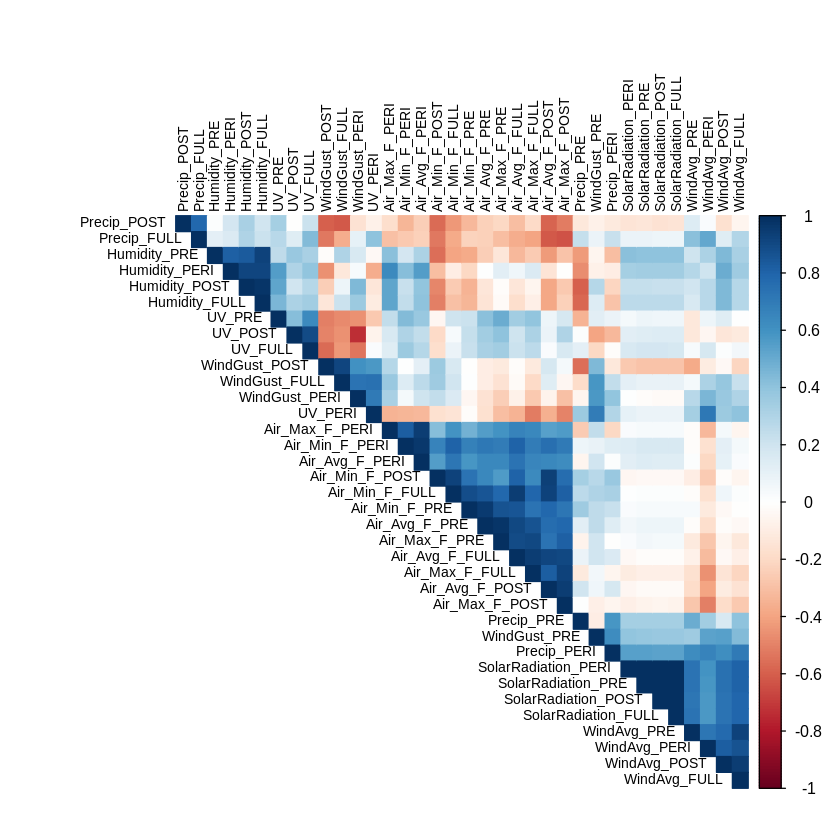

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 36 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 36 rows containing missing values or values outside the scale range
(`geom_point()`).”


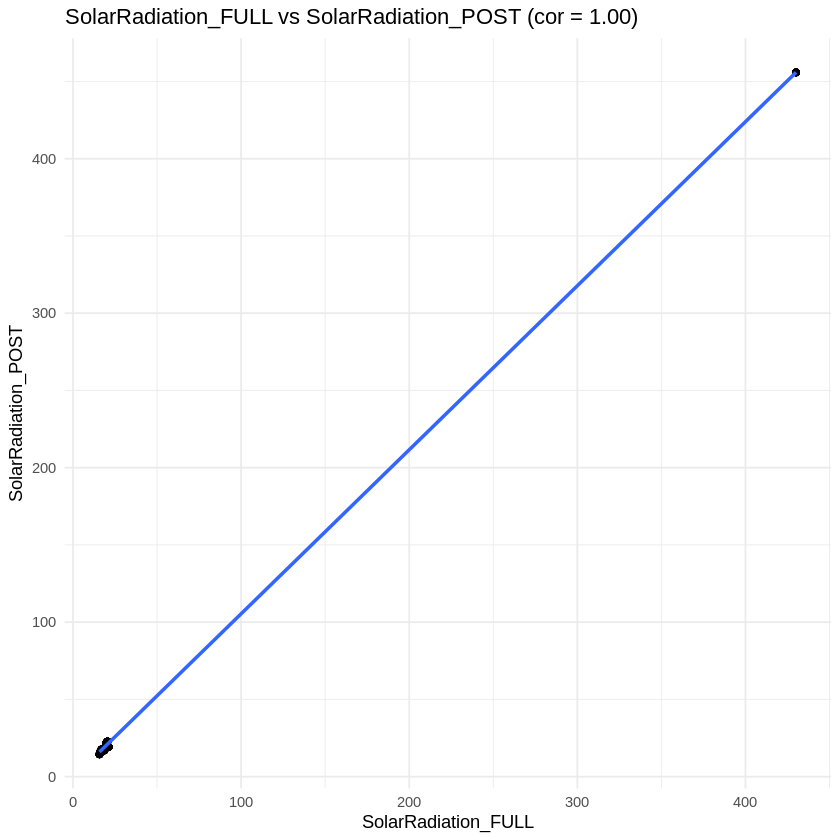

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 36 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 36 rows containing missing values or values outside the scale range
(`geom_point()`).”


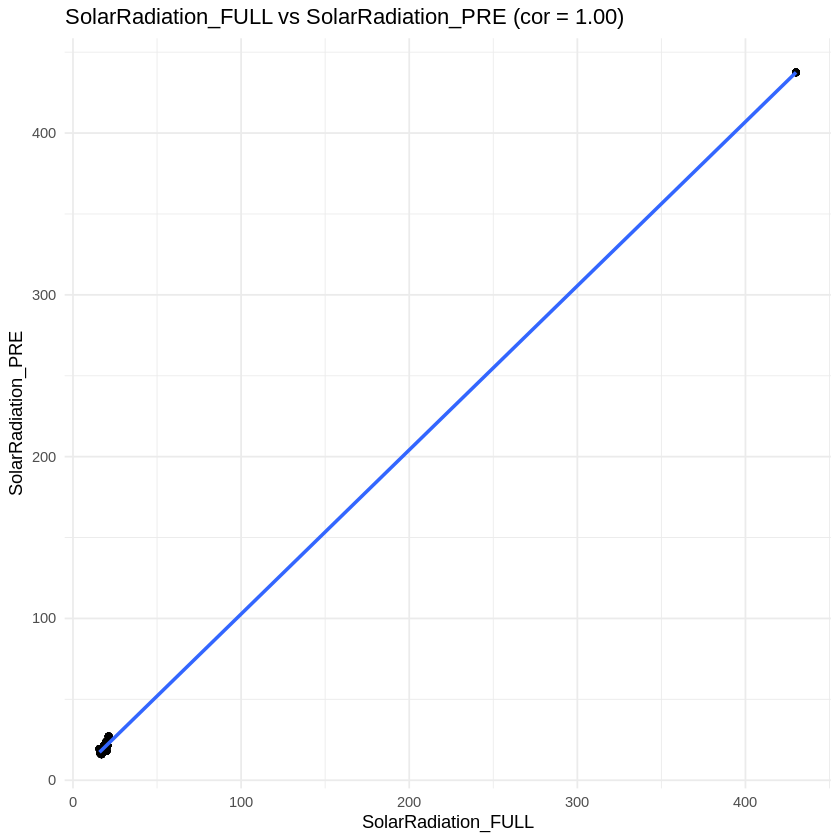

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 36 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 36 rows containing missing values or values outside the scale range
(`geom_point()`).”


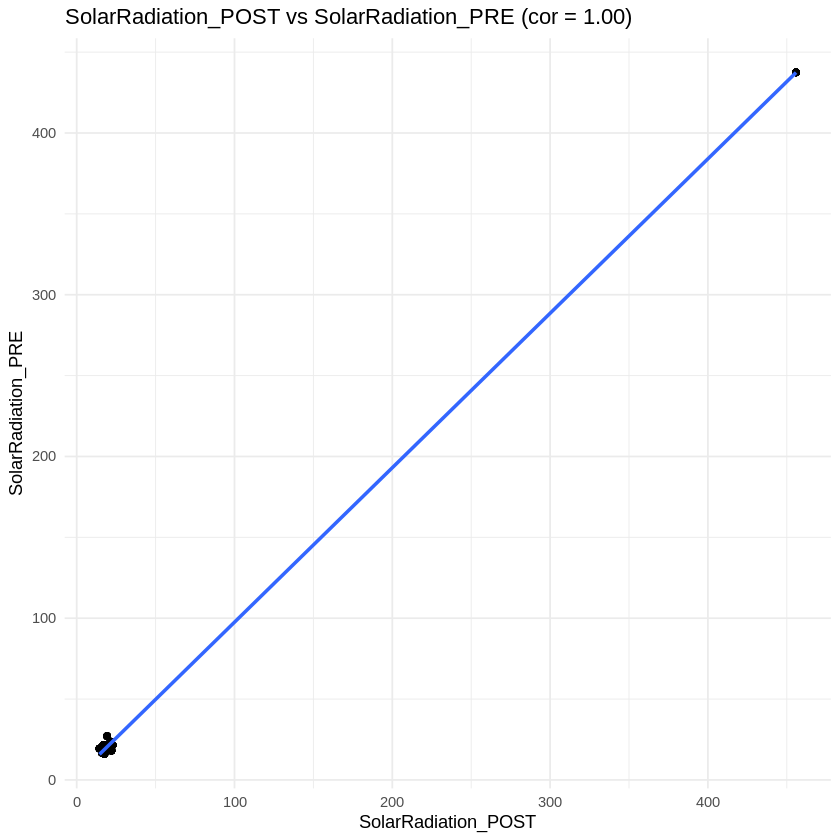

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 36 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 36 rows containing missing values or values outside the scale range
(`geom_point()`).”


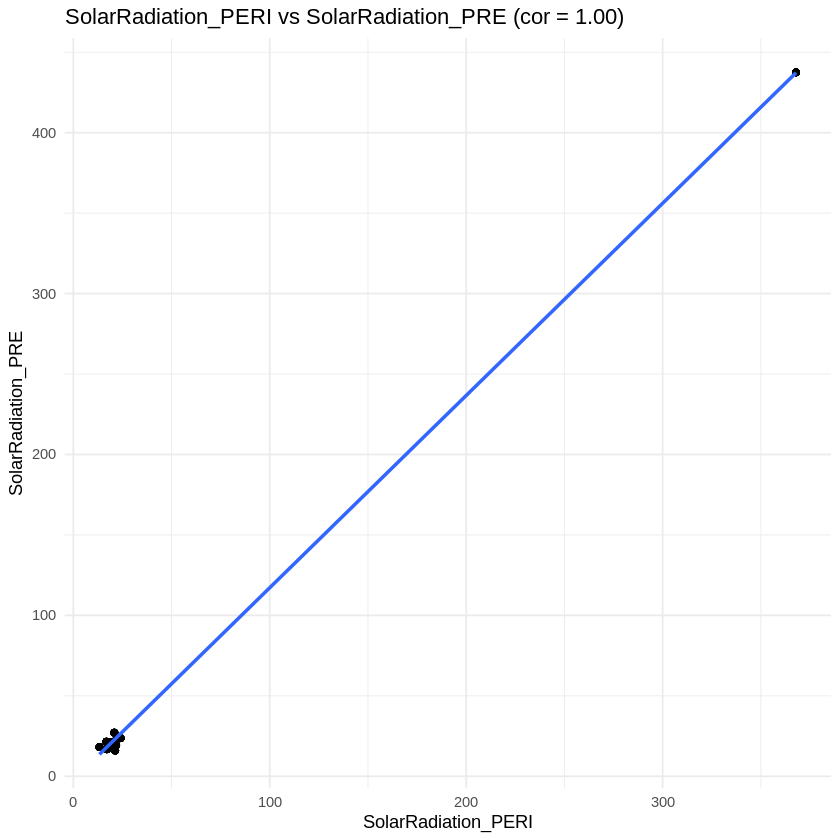

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 36 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 36 rows containing missing values or values outside the scale range
(`geom_point()`).”


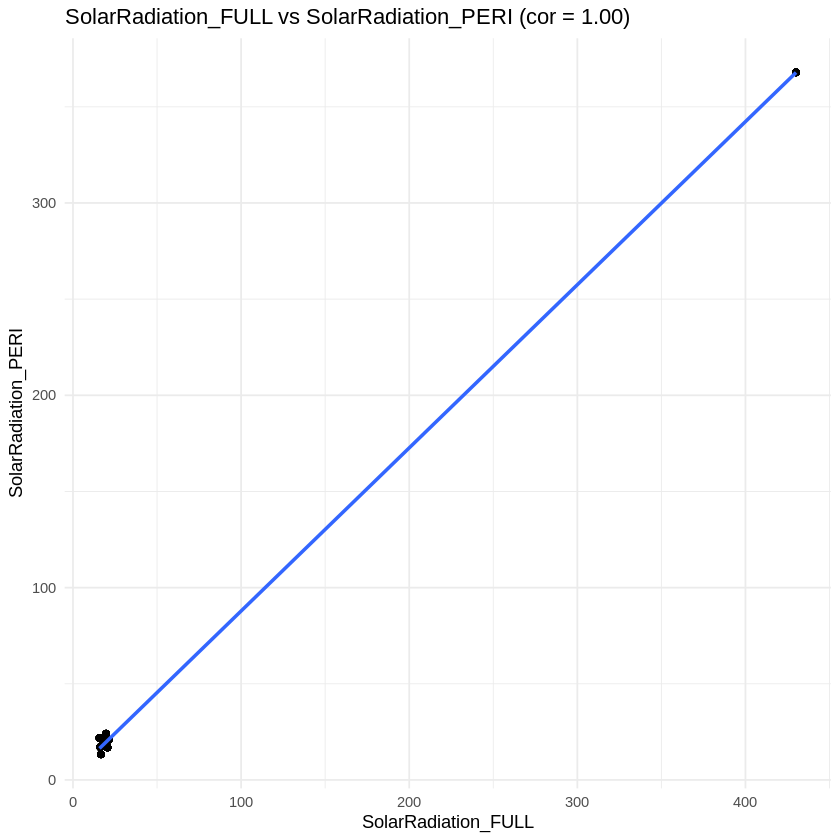

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 61 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 61 rows containing missing values or values outside the scale range
(`geom_point()`).”


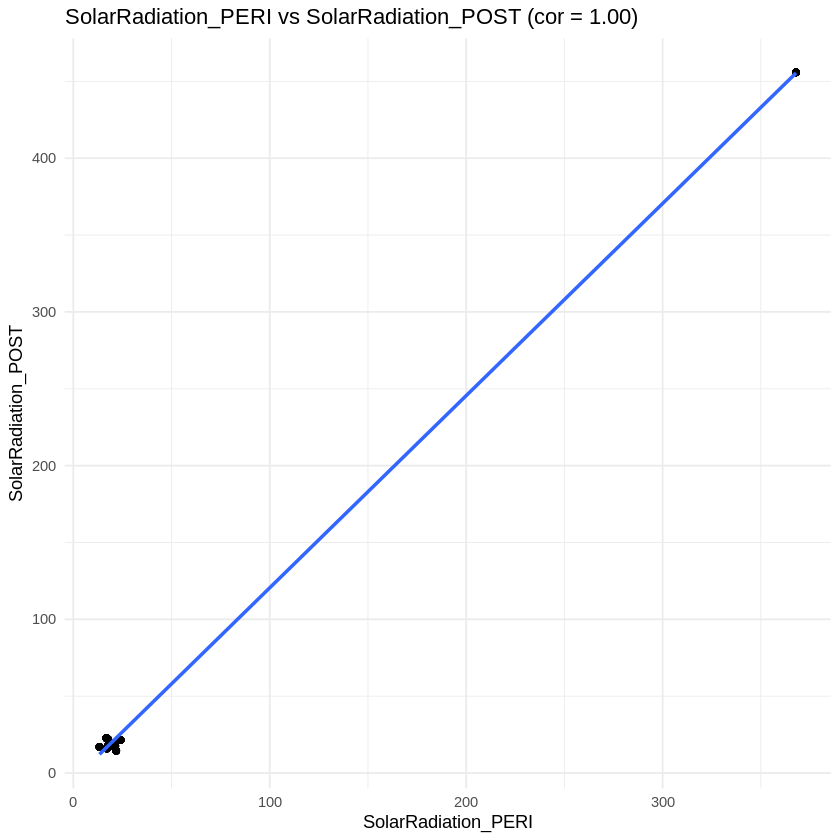

`geom_smooth()` using formula = 'y ~ x'


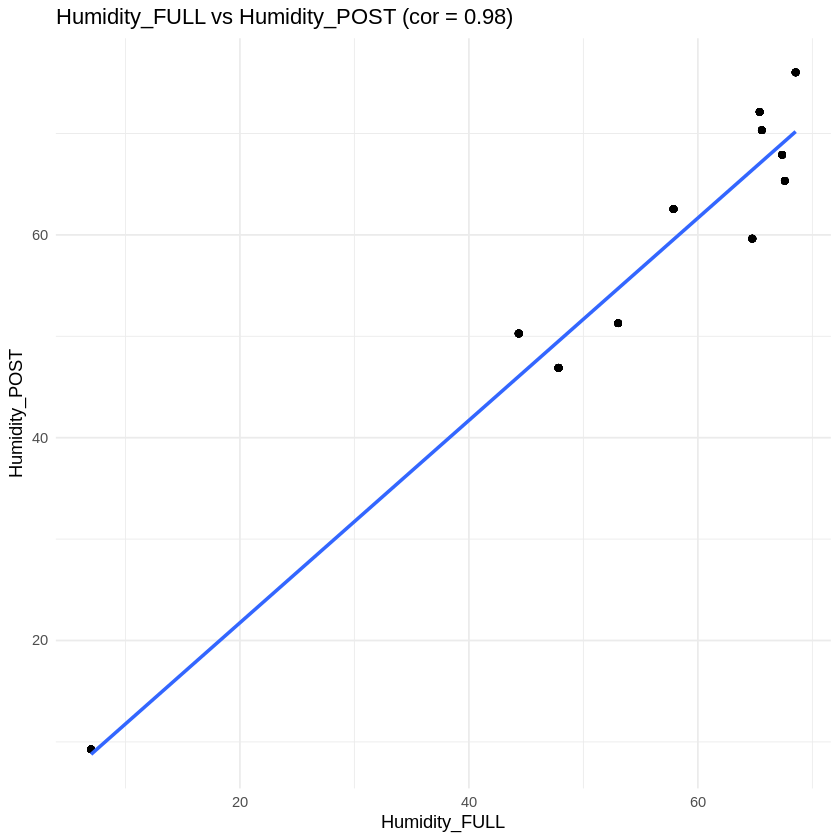

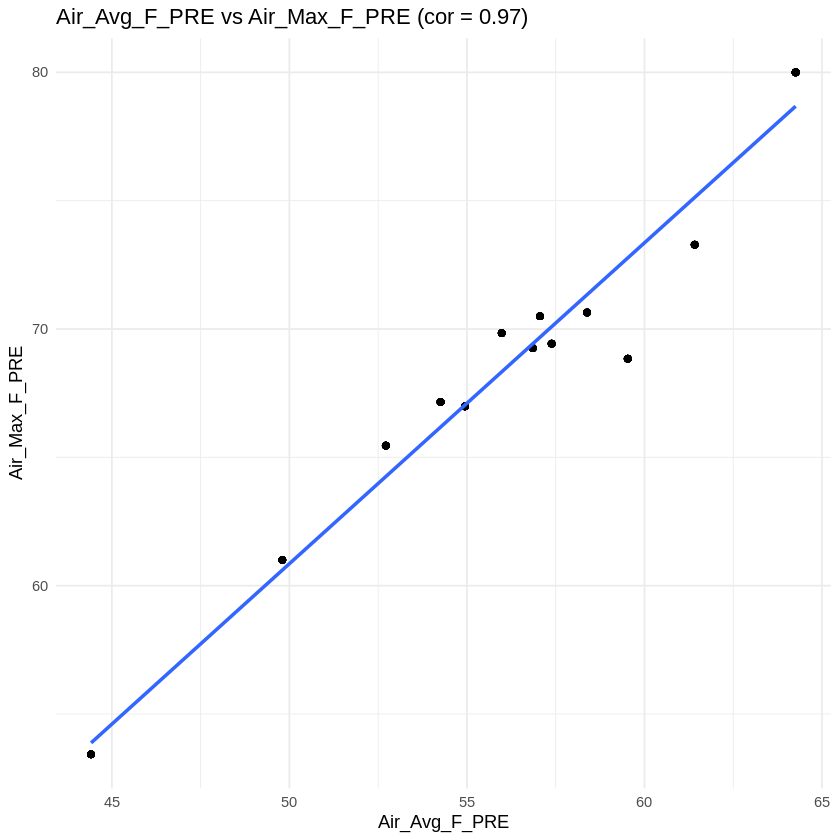

In [16]:
# --- 1) load / install packages ------------------------------------------------
pkgs <- c("dplyr", "tidyr", "ggplot2", "corrplot", "tibble")
for(p in pkgs){
  if(!requireNamespace(p, quietly = TRUE)) install.packages(p)
}
lapply(pkgs, library, character.only = TRUE)

# --- 2) specify predictor names ------------------------------------------------
predictors <- c(
  "Air_Min_F_PRE","Air_Avg_F_PRE","Air_Max_F_PRE","WindAvg_PRE","WindGust_PRE","Precip_PRE","SolarRadiation_PRE","Humidity_PRE", "UV_PRE",
  "Air_Min_F_PERI","Air_Avg_F_PERI","Air_Max_F_PERI","WindAvg_PERI","WindGust_PERI","Precip_PERI","SolarRadiation_PERI","Humidity_PERI", "UV_PERI",
  "Air_Min_F_POST","Air_Avg_F_POST","Air_Max_F_POST","WindAvg_POST","WindGust_POST","Precip_POST","SolarRadiation_POST","Humidity_POST", "UV_POST",
  "Air_Min_F_FULL","Air_Avg_F_FULL","Air_Max_F_FULL","WindAvg_FULL","WindGust_FULL","Precip_FULL","SolarRadiation_FULL","Humidity_FULL", "UV_FULL"
)

# --- 3) check which predictors exist in the joined dataframe -------------------
missing_preds <- setdiff(predictors, names(inf_env_df))
if(length(missing_preds) > 0){
  warning("The following predictor columns are missing from inf_env_df and will be skipped:\n",
          paste(missing_preds, collapse = ", "))
}
available_preds <- intersect(predictors, names(inf_env_df))
if(length(available_preds) == 0) stop("No predictor columns found in inf_env_df. Check names/joins.")

# --- 4) create a numeric predictor dataframe (coerce with warning) -------------
pred_df <- inf_env_df %>%
  dplyr::select(all_of(available_preds)) %>%
  mutate(across(everything(), ~ as.numeric(as.character(.))))

# report columns that produced new NAs during coercion
na_counts <- colSums(is.na(pred_df))
cat("NA counts per predictor (after coercion):\n")
print(na_counts)

# --- 5) compute correlation matrix (pairwise complete.obs) --------------------
cor_mat <- stats::cor(pred_df, use = "pairwise.complete.obs")
cor_mat_rounded <- round(cor_mat, 2)
print(cor_mat_rounded)   # quick numeric view

# --- 6) clustered correlation heatmap -----------------------------------------
# saves file and also plots to the notebook
png(filename = "env_predictors_correlation_heatmap.png", width = 1200, height = 1000, res = 150)
corrplot::corrplot(cor_mat, method = "color", type = "upper", order = "hclust",
                   tl.cex = 0.7, tl.col = "black", addrect = 4, na.label = "square")
dev.off()
cat("Heatmap written to env_predictors_correlation_heatmap.png\n")

# also draw inline (if in notebook)
corrplot::corrplot(cor_mat, method = "color", type = "upper", order = "hclust",
                   tl.cex = 0.7, tl.col = "black", addrect = 4, na.label = "square")

# --- 7) list high-correlation pairs -------------------------------------------
threshold <- 0.80  # change if you want a different cutoff
high_idx <- which(abs(cor_mat) > threshold & abs(cor_mat) < 1, arr.ind = TRUE)
if(nrow(high_idx) == 0){
  cat("No predictor pairs exceed the absolute correlation threshold of", threshold, "\n")
} else {
  high_pairs <- tibble::tibble(
    var1 = rownames(cor_mat)[high_idx[,1]],
    var2 = colnames(cor_mat)[high_idx[,2]],
    corr = cor_mat[high_idx]
  ) %>%
    # keep only unique unordered pairs (var1 < var2)
    dplyr::filter(var1 < var2) %>%
    dplyr::arrange(dplyr::desc(abs(corr)))
  cat("Predictor pairs with |correlation| >", threshold, ":\n")
  print(high_pairs)
}

# --- 8) optional: quick pair plots for top N correlated pairs -----------------
topN <- 8
if(exists("high_pairs") && nrow(high_pairs) > 0){
  top_pairs <- head(high_pairs, topN)
  for(i in seq_len(nrow(top_pairs))){
    xvar <- top_pairs$var1[i]; yvar <- top_pairs$var2[i]
    p <- ggplot2::ggplot(inf_env_df, ggplot2::aes_string(x = xvar, y = yvar)) +
      ggplot2::geom_point(alpha = 0.6) +
      ggplot2::geom_smooth(method = "lm", se = FALSE) +
      ggplot2::ggtitle(sprintf("%s vs %s (cor = %.2f)", xvar, yvar, top_pairs$corr[i])) +
      ggplot2::theme_minimal()
    print(p)
  }
} else {
  cat("No high-correlation pairs to plot.\n")
}


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-10



[[1]]
 [1] "glmnet"      "Matrix"      "tibble"      "corrplot"    "ggplot2"    
 [6] "tidyr"       "dplyr"       "readr"       "googledrive" "stats"      
[11] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[16] "base"       

[[2]]
 [1] "glmnet"      "Matrix"      "tibble"      "corrplot"    "ggplot2"    
 [6] "tidyr"       "dplyr"       "readr"       "googledrive" "stats"      
[11] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[16] "base"       

[[3]]
 [1] "glmnet"      "Matrix"      "tibble"      "corrplot"    "ggplot2"    
 [6] "tidyr"       "dplyr"       "readr"       "googledrive" "stats"      
[11] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[16] "base"       

[[4]]
 [1] "glmnet"      "Matrix"      "tibble"      "corrplot"    "ggplot2"    
 [6] "tidyr"       "dplyr"       "readr"       "googledrive" "stats"      
[11] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[16] "base"

Lambda.min = 0.5365457 
Lambda.1se = 4.559316 
Variables selected by LASSO:
        Variable   Coefficient
1    (Intercept) -4.5934178296
2         UV_PRE  4.1736035267
3 Air_Avg_F_PERI  0.0832171971
4 Air_Max_F_PERI  0.0001432007
5        UV_FULL  0.4427106283
Cross-validated R² = 0.088 


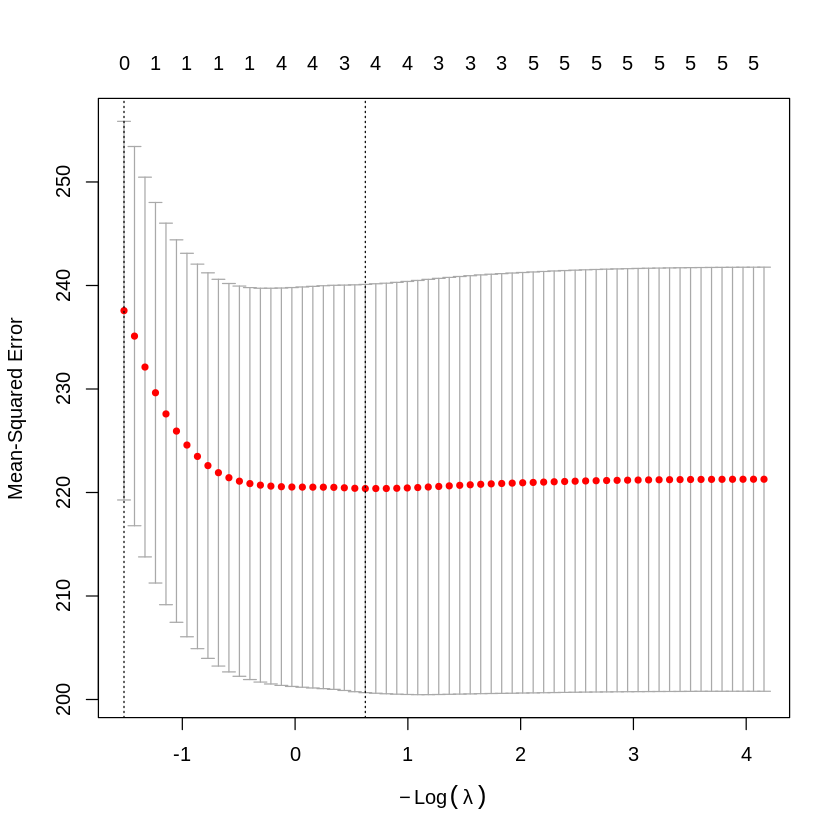

In [17]:
# --- 1) Load required packages ---------------------------------------------
pkgs <- c("glmnet", "dplyr", "tidyr", "tibble")
for(p in pkgs){
  if(!requireNamespace(p, quietly = TRUE)) install.packages(p)
}
lapply(pkgs, library, character.only = TRUE)

# --- 2) Define response and predictor variables -----------------------------
response_var <- "infection"

predictors <- c(
  "Air_Min_F_PRE","Air_Avg_F_PRE","Air_Max_F_PRE","WindAvg_PRE","WindGust_PRE","Precip_PRE","SolarRadiation_PRE","Humidity_PRE", "UV_PRE",
  "Air_Min_F_PERI","Air_Avg_F_PERI","Air_Max_F_PERI","WindAvg_PERI","WindGust_PERI","Precip_PERI","SolarRadiation_PERI","Humidity_PERI", "UV_PERI",
  "Air_Min_F_POST","Air_Avg_F_POST","Air_Max_F_POST","WindAvg_POST","WindGust_POST","Precip_POST","SolarRadiation_POST","Humidity_POST", "UV_POST",
  "Air_Min_F_FULL","Air_Avg_F_FULL","Air_Max_F_FULL","WindAvg_FULL","WindGust_FULL","Precip_FULL","SolarRadiation_FULL","Humidity_FULL", "UV_FULL"
)

# --- 3) Prepare data: select relevant columns, remove missing rows ----------
lasso_df <- inf_env_df %>%
  dplyr::select(all_of(c(response_var, predictors))) %>%
  tidyr::drop_na()   # LASSO cannot handle NA values

# Convert to matrices for glmnet
X <- as.matrix(lasso_df[, predictors])
y <- as.numeric(lasso_df[[response_var]])

# --- 4) Fit cross-validated LASSO ------------------------------------------
set.seed(123)  # reproducibility
cv_lasso <- cv.glmnet(X, y, alpha = 1, nfolds = 10, standardize = TRUE)

# --- 5) Plot cross-validation results ---------------------------------------
plot(cv_lasso)
cat("Lambda.min =", cv_lasso$lambda.min, "\n")
cat("Lambda.1se =", cv_lasso$lambda.1se, "\n")

# --- 6) Extract coefficients at best lambda ---------------------------------
coef_lasso <- coef(cv_lasso, s = "lambda.min")
coef_table <- as.data.frame(as.matrix(coef_lasso))
coef_table <- tibble::rownames_to_column(coef_table, "Variable")
names(coef_table)[2] <- "Coefficient"

# Keep only non-zero coefficients (selected variables)
selected_vars <- coef_table %>%
  dplyr::filter(Coefficient != 0)

cat("Variables selected by LASSO:\n")
print(selected_vars)

# --- 7) Evaluate model performance -----------------------------------------
preds <- predict(cv_lasso, newx = X, s = "lambda.min")
r2 <- 1 - sum((y - preds)^2) / sum((y - mean(y))^2)
cat("Cross-validated R² =", round(r2, 3), "\n")


Lambda.min = 1.073091 
Lambda.1se = 9.118631 
Variables selected by Elastic Net:
        Variable Coefficient
1    (Intercept) -4.95622018
2  Air_Min_F_PRE  0.06049148
3  Air_Avg_F_PRE  0.03976425
4         UV_PRE  3.19746639
5 Air_Max_F_PERI  0.02573812
6        UV_FULL  1.19301453
Cross-validated R² (Elastic Net) = 0.088 


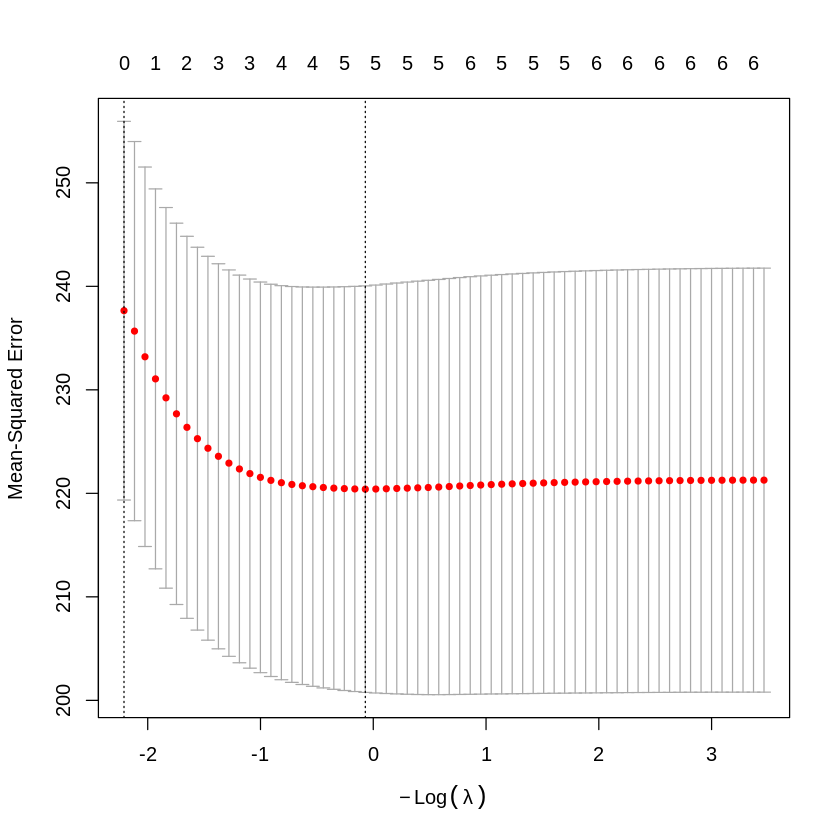

In [18]:
# --- 1) Fit Elastic Net with alpha = 0.5 (balanced L1/L2 penalties) -------------
set.seed(123)
cv_elnet <- cv.glmnet(X, y, alpha = 0.5, nfolds = 10, standardize = TRUE)

# --- 2) Plot cross-validation curve --------------------------------------------
plot(cv_elnet)
cat("Lambda.min =", cv_elnet$lambda.min, "\n")
cat("Lambda.1se =", cv_elnet$lambda.1se, "\n")

# --- 3) Extract coefficients at best lambda -----------------------------------
coef_elnet <- coef(cv_elnet, s = "lambda.min")
coef_elnet_table <- as.data.frame(as.matrix(coef_elnet))
coef_elnet_table <- tibble::rownames_to_column(coef_elnet_table, "Variable")
names(coef_elnet_table)[2] <- "Coefficient"

selected_elnet_vars <- coef_elnet_table %>%
  dplyr::filter(Coefficient != 0)

cat("Variables selected by Elastic Net:\n")
print(selected_elnet_vars)

# --- 4) Evaluate performance ---------------------------------------------------
preds_elnet <- predict(cv_elnet, newx = X, s = "lambda.min")
r2_elnet <- 1 - sum((y - preds_elnet)^2) / sum((y - mean(y))^2)
cat("Cross-validated R² (Elastic Net) =", round(r2_elnet, 3), "\n")


,Var1,Var2,Corr
,<chr>,<chr>,<dbl>
151,SolarRadiation_FULL,SolarRadiation_POST,0.9999524
206,SolarRadiation_POST,SolarRadiation_FULL,0.9999524
52,SolarRadiation_FULL,SolarRadiation_PRE,0.9999498
201,SolarRadiation_PRE,SolarRadiation_FULL,0.9999498
50,SolarRadiation_POST,SolarRadiation_PRE,0.9998352
145,SolarRadiation_PRE,SolarRadiation_POST,0.9998352
48,SolarRadiation_PERI,SolarRadiation_PRE,0.9995462
101,SolarRadiation_PRE,SolarRadiation_PERI,0.9995462
107,SolarRadiation_FULL,SolarRadiation_PERI,0.9995300


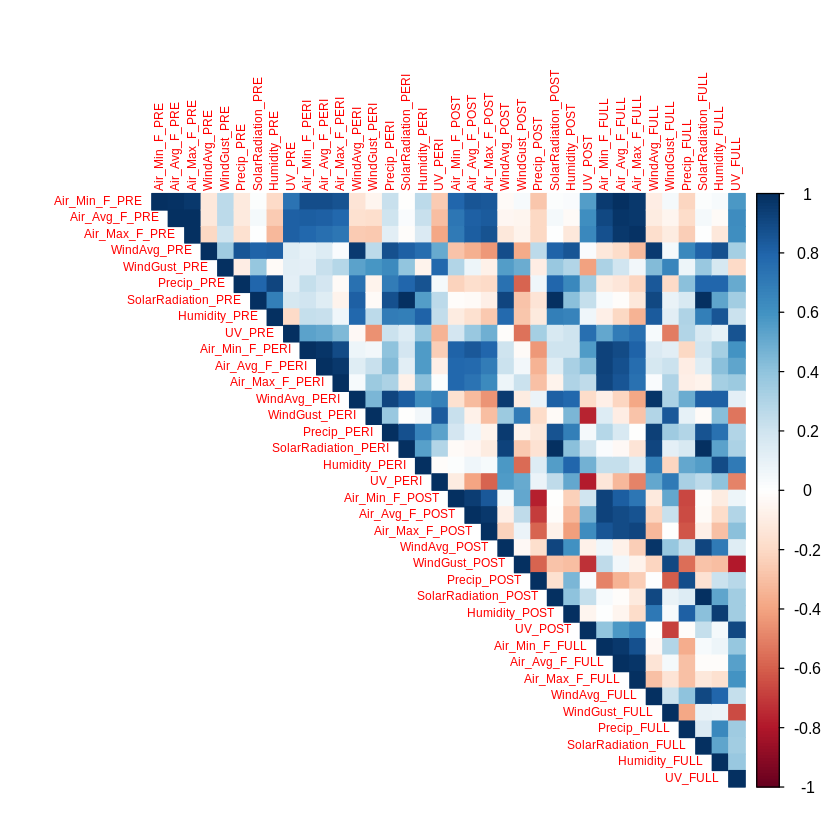

In [19]:
library(corrplot)

# Compute correlation matrix for all predictors
corr_mat <- cor(lasso_df[, predictors], use = "pairwise.complete.obs")

# Visualize correlations
corrplot(corr_mat, method = "color", type = "upper", tl.cex = 0.6)

# Identify pairs with |r| > 0.8
high_corr_pairs <- which(abs(corr_mat) > 0.8 & abs(corr_mat) < 1, arr.ind = TRUE)
corr_pairs_df <- data.frame(
  Var1 = rownames(corr_mat)[high_corr_pairs[,1]],
  Var2 = colnames(corr_mat)[high_corr_pairs[,2]],
  Corr = corr_mat[high_corr_pairs]
)
head(corr_pairs_df[order(-abs(corr_pairs_df$Corr)), ], 20)


In [20]:
corr_pairs_df[order(-abs(corr_pairs_df$Corr)), ]

,Var1,Var2,Corr
,<chr>,<chr>,<dbl>
151,SolarRadiation_FULL,SolarRadiation_POST,0.9999524
206,SolarRadiation_POST,SolarRadiation_FULL,0.9999524
52,SolarRadiation_FULL,SolarRadiation_PRE,0.9999498
201,SolarRadiation_PRE,SolarRadiation_FULL,0.9999498
50,SolarRadiation_POST,SolarRadiation_PRE,0.9998352
145,SolarRadiation_PRE,SolarRadiation_POST,0.9998352
48,SolarRadiation_PERI,SolarRadiation_PRE,0.9995462
101,SolarRadiation_PRE,SolarRadiation_PERI,0.9995462
107,SolarRadiation_FULL,SolarRadiation_PERI,0.9995300


In [21]:
install.packages("caret")
library(caret)

# Threshold for "high correlation"
corr_threshold <- 0.8

# Compute correlation matrix again (just to be sure)
corr_mat <- cor(lasso_df[, predictors], use = "pairwise.complete.obs")

# Find groups of highly correlated variables
# caret::findCorrelation returns indices to remove
drop_indices <- findCorrelation(corr_mat, cutoff = corr_threshold, verbose = TRUE)

# Variables to drop
drop_vars <- colnames(corr_mat)[drop_indices]
cat("Dropping", length(drop_vars), "highly correlated variables:\n")
print(drop_vars)

# Keep the reduced set
predictors_reduced <- setdiff(predictors, drop_vars)
length(predictors_reduced)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



Compare row 4  and column  13 with corr  0.96 
  Means:  0.47 vs 0.397 so flagging column 4 
Compare row 13  and column  15 with corr  0.919 
  Means:  0.449 vs 0.393 so flagging column 13 
Compare row 15  and column  31 with corr  0.937 
  Means:  0.433 vs 0.391 so flagging column 15 
Compare row 21  and column  30 with corr  0.912 
  Means:  0.47 vs 0.386 so flagging column 21 
Compare row 30  and column  10 with corr  0.806 
  Means:  0.464 vs 0.381 so flagging column 30 
Compare row 10  and column  11 with corr  0.976 
  Means:  0.448 vs 0.376 so flagging column 10 
Compare row 31  and column  22 with corr  0.977 
  Means:  0.412 vs 0.373 so flagging column 31 
Compare row 36  and column  27 with corr  0.907 
  Means:  0.454 vs 0.369 so flagging column 36 
Compare row 11  and column  29 with corr  0.875 
  Means:  0.423 vs 0.363 so flagging column 11 
Compare row 20  and column  3 with corr  0.824 
  Means:  0.398 vs 0.359 so flagging column 20 
Compare row 17  and column  6 with c

[1] 9

In [22]:
X_reduced <- as.matrix(lasso_df[, predictors_reduced])

set.seed(123)
cv_elnet_reduced <- cv.glmnet(X_reduced, y, alpha = 0.5, nfolds = 10, standardize = TRUE)

# Extract results
coef_elnet_reduced <- coef(cv_elnet_reduced, s = "lambda.min")
coef_table_reduced <- as.data.frame(as.matrix(coef_elnet_reduced))
coef_table_reduced <- tibble::rownames_to_column(coef_table_reduced, "Variable")
names(coef_table_reduced)[2] <- "Coefficient"

selected_reduced_vars <- coef_table_reduced %>%
  dplyr::filter(Coefficient != 0)

cat("Variables selected by reduced Elastic Net model:\n")
print(selected_reduced_vars)

# Model fit
preds_reduced <- predict(cv_elnet_reduced, newx = X_reduced, s = "lambda.min")
r2_reduced <- 1 - sum((y - preds_reduced)^2) / sum((y - mean(y))^2)
cat("Cross-validated R² (reduced Elastic Net) =", round(r2_reduced, 3), "\n")

Variables selected by reduced Elastic Net model:
       Variable Coefficient
1   (Intercept)  -3.9865030
2 Air_Avg_F_PRE   0.4621402
3       UV_POST   0.8309995
4 WindGust_FULL  -0.2083786
5   Precip_FULL  30.5961052
Cross-validated R² (reduced Elastic Net) = 0.088 


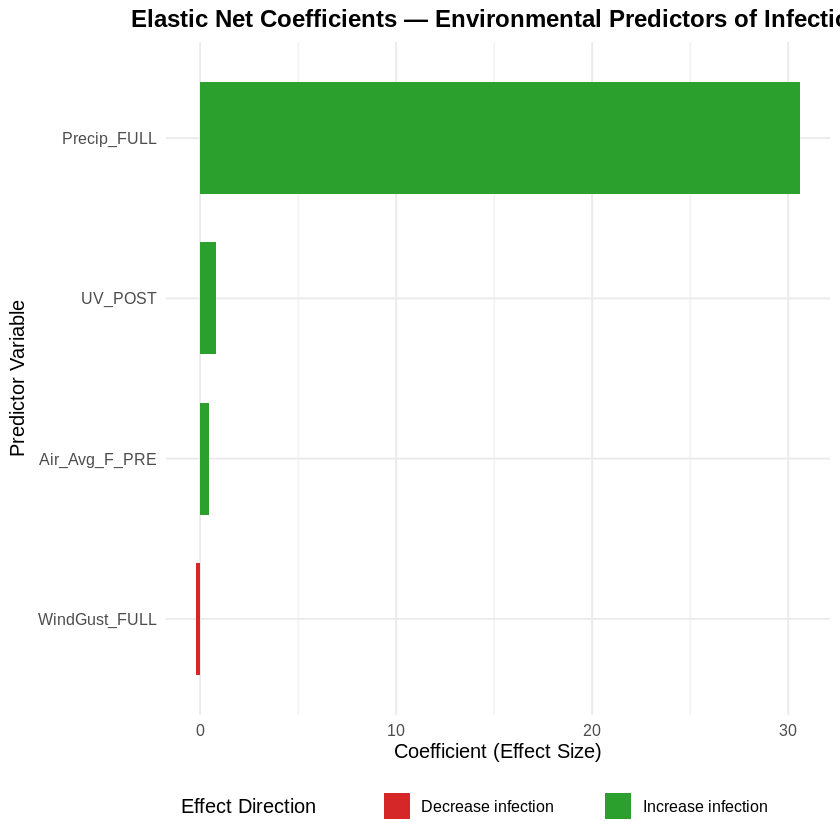

In [26]:
library(ggplot2)

# Prepare data for plotting
coef_plot_df <- selected_reduced_vars %>%
  filter(Variable != "(Intercept)") %>%  # drop intercept
  arrange(desc(abs(Coefficient))) %>%
  mutate(Variable = factor(Variable, levels = Variable[order(abs(Coefficient))]))

# Plot
ggplot(coef_plot_df, aes(x = Variable, y = Coefficient, fill = Coefficient > 0)) +
  geom_bar(stat = "identity", width = 0.7) +
  coord_flip() +
  scale_fill_manual(values = c("TRUE" = "#2ca02c", "FALSE" = "#d62728"),
                    labels = c("Decrease infection", "Increase infection")) +
  labs(
    title = "Elastic Net Coefficients — Environmental Predictors of Infection",
    x = "Predictor Variable",
    y = "Coefficient (Effect Size)",
    fill = "Effect Direction"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "bottom",
    plot.title = element_text(face = "bold", hjust = 0.5)
  )


In [ ]:
# Hourly Data

In [27]:
# --- 1) Load packages --------------------------------------------------------
# List all needed packages
pkgs <- c("dplyr", "tidyr", "purrr", "zoo")

# Install any that are missing
for (p in pkgs) {
  if (!requireNamespace(p, quietly = TRUE)) {
    install.packages(p)
  }
}

# Load them (suppress startup messages for clarity)
suppressPackageStartupMessages(
  lapply(pkgs, library, character.only = TRUE)
)

# --- 1) Compute daily diurnal metrics ----------------------------------------
daily_fluct_df <- env_h_df %>%
  group_by(Year, state, Date, DayFromInoc) %>%
  summarise(
    Air_Min_Day = min(Air_Min_F, na.rm = TRUE),
    Air_Max_Day = max(Air_Max_F, na.rm = TRUE),
    Air_Avg_SD_Day = sd(Air_Avg_F, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(
    Diurnal_Amplitude = Air_Max_Day - Air_Min_Day
  )

# --- 2) Helper function to compute warm-hour sequences -----------------------
compute_warm_sequences <- function(temp_vector, threshold = 65) {
  if (all(is.na(temp_vector))) return(c(LongestRun = NA, TotalWarmHours = NA))
  warm_seq <- temp_vector > threshold
  rle_warm <- rle(warm_seq)
  longest <- ifelse(any(rle_warm$values), max(rle_warm$lengths[rle_warm$values]), 0)
  total_warm <- sum(warm_seq, na.rm = TRUE)
  return(c(LongestRun = longest, TotalWarmHours = total_warm))
}

# --- 3) Summarization function (per inoculation window) ----------------------
summarize_window <- function(df, daily_fluct_df, window_name) {

  df %>%
    group_by(Year, state) %>%
    summarise(
      # --- Temperature thresholds ---
      HoursAbove60 = sum(Air_Avg_F > 60, na.rm = TRUE),
      HoursAbove65 = sum(Air_Avg_F > 65, na.rm = TRUE),
      HoursAbove70 = sum(Air_Avg_F > 70, na.rm = TRUE),
      DegHrAbove65 = sum(pmax(0, Air_Avg_F - 65), na.rm = TRUE),

      # --- Warm-hour sequence metrics ---
      LongestWarmRun = compute_warm_sequences(Air_Avg_F, threshold = 65)["LongestRun"],
      TotalWarmHours = compute_warm_sequences(Air_Avg_F, threshold = 65)["TotalWarmHours"],

      # --- Temperature variability (hourly) ---
      Temp_Mean = mean(Air_Avg_F, na.rm = TRUE),
      Temp_SD = sd(Air_Avg_F, na.rm = TRUE),
      Temp_CV = Temp_SD / Temp_Mean,

      # --- Diurnal metrics ---
      DiurnalAmp_Mean = mean(daily_fluct_df$Diurnal_Amplitude[daily_fluct_df$state == unique(state) & daily_fluct_df$Year == unique(Year)], na.rm = TRUE),
      DiurnalAmp_SD = sd(daily_fluct_df$Diurnal_Amplitude[daily_fluct_df$state == unique(state) & daily_fluct_df$Year == unique(Year)], na.rm = TRUE),
      Temp_SDdaily_Mean = mean(daily_fluct_df$Air_Avg_SD_Day[daily_fluct_df$state == unique(state) & daily_fluct_df$Year == unique(Year)], na.rm = TRUE),

      # --- Other environmental summaries ---
      WindAvg_Mean = mean(WindAvg, na.rm = TRUE),
      WindGust_Max = max(WindGust, na.rm = TRUE),
      Precip_Sum = sum(Precip, na.rm = TRUE),
      Solar_Sum = sum(SolarRadiation, na.rm = TRUE),
      Humidity_Mean = mean(Humidity, na.rm = TRUE),
      Humidity_SD = sd(Humidity, na.rm = TRUE),

      # --- Compound indicators ---
      WarmHumidHours = sum(Air_Avg_F > 65 & Humidity > 80, na.rm = TRUE),
      WarmWetHours = sum(Air_Avg_F > 65 & LeafWetness > 0, na.rm = TRUE),
      .groups = "drop"
    ) %>%
    rename_with(~ paste0(., "_", window_name), -c(Year, state))
}

# --- 4) Define windows -------------------------------------------------------
pre_df   <- env_h_df %>% filter(DayFromInoc >= -7  & DayFromInoc <= -1)
peri_df  <- env_h_df %>% filter(DayFromInoc >=  0  & DayFromInoc <=  3)
post_df  <- env_h_df %>% filter(DayFromInoc >=  4  & DayFromInoc <= 14)
full_df  <- env_h_df %>% filter(DayFromInoc >= -14 & DayFromInoc <= 14)

# --- 5) Apply summarization --------------------------------------------------
env_summary_h <- list(
  PRE  = summarize_window(pre_df,  daily_fluct_df, "PRE"),
  PERI = summarize_window(peri_df, daily_fluct_df, "PERI"),
  POST = summarize_window(post_df, daily_fluct_df, "POST"),
  FULL = summarize_window(full_df, daily_fluct_df, "FULL")
) %>%
  reduce(full_join, by = c("Year", "state"))

# --- 6) Inspect new warm-sequence metrics ------------------------------------
env_summary_h %>%
  select(Year, state, starts_with("LongestWarmRun"), starts_with("TotalWarmHours")) %>%
  head()


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[[1]]
 [1] "caret"       "lattice"     "glmnet"      "Matrix"      "tibble"     
 [6] "corrplot"    "ggplot2"     "tidyr"       "dplyr"       "readr"      
[11] "googledrive" "stats"       "graphics"    "grDevices"   "utils"      
[16] "datasets"    "methods"     "base"       

[[2]]
 [1] "caret"       "lattice"     "glmnet"      "Matrix"      "tibble"     
 [6] "corrplot"    "ggplot2"     "tidyr"       "dplyr"       "readr"      
[11] "googledrive" "stats"       "graphics"    "grDevices"   "utils"      
[16] "datasets"    "methods"     "base"       

[[3]]
 [1] "purrr"       "caret"       "lattice"     "glmnet"      "Matrix"     
 [6] "tibble"      "corrplot"    "ggplot2"     "tidyr"       "dplyr"      
[11] "readr"       "googledrive" "stats"       "graphics"    "grDevices"  
[16] "utils"       "datasets"    "methods"     "base"       

[[4]]
 [1] "zoo"         "purrr"       "caret"       "lattice"     "glmnet"     
 [6] "Matrix"      "tibble"      "corrplot"    "ggplot2"     "tidyr"      
[11] "dplyr"       "readr"       "googledrive" "stats"       "graphics"   
[16] "grDevices"   "utils"       "datasets"    "methods"     "base"

Warning message:
“There were 293 warnings in `summarise()`.
The first warning was:
ℹ In argument: `Air_Min_Day = min(Air_Min_F, na.rm = TRUE)`.
ℹ In group 22: `Year = 2023`, `state = "NC"`, `Date = "3/27/23"`, `DayFromInoc
  = -7`.
Caused by warning in `min()`:
! no non-missing arguments to min; returning Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 292 remaining warnings.”
Warning message:
“There were 2 warnings in `summarise()`.
The first warning was:
ℹ In argument: `WindGust_Max = max(WindGust, na.rm = TRUE)`.
ℹ In group 3: `Year = 2023` `state = "NY"`.
Caused by warning in `max()`:
! no non-missing arguments to max; returning -Inf
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“There were 2 warnings in `summarise()`.
The first warning was:
ℹ In argument: `WindGust_Max = max(WindGust, na.rm = TRUE)`.
ℹ In group 3: `Year = 2023` `state = "NY"`.
Caused by warning in `max()`:
! no non-missing arguments to max; returning -Inf
ℹ Run `dplyr::

Year,state,LongestWarmRun_PRE,LongestWarmRun_PERI,LongestWarmRun_POST,LongestWarmRun_FULL,TotalWarmHours_PRE,TotalWarmHours_PERI,TotalWarmHours_POST,TotalWarmHours_FULL
<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2023,MI,NA,NA,NA,NA,NA,NA,NA,NA
2023,NC,10,18,9,18,30,43,50,123
2023,NY,15,11,13,17,41,31,50,122
2023,WA,13,17,19,19,67,37,133,237
2024,East Lansing,NA,12,15,NA,69,23,74,166
2024,NY,13,9,40,40,38,18,94,168


In [28]:
names(env_summary_h)

[1] "Year"                   "state"                  "HoursAbove60_PRE"      
 [4] "HoursAbove65_PRE"       "HoursAbove70_PRE"       "DegHrAbove65_PRE"      
 [7] "LongestWarmRun_PRE"     "TotalWarmHours_PRE"     "Temp_Mean_PRE"         
[10] "Temp_SD_PRE"            "Temp_CV_PRE"            "DiurnalAmp_Mean_PRE"   
[13] "DiurnalAmp_SD_PRE"      "Temp_SDdaily_Mean_PRE"  "WindAvg_Mean_PRE"      
[16] "WindGust_Max_PRE"       "Precip_Sum_PRE"         "Solar_Sum_PRE"         
[19] "Humidity_Mean_PRE"      "Humidity_SD_PRE"        "WarmHumidHours_PRE"    
[22] "WarmWetHours_PRE"       "HoursAbove60_PERI"      "HoursAbove65_PERI"     
[25] "HoursAbove70_PERI"      "DegHrAbove65_PERI"      "LongestWarmRun_PERI"   
[28] "TotalWarmHours_PERI"    "Temp_Mean_PERI"         "Temp_SD_PERI"          
[31] "Temp_CV_PERI"           "DiurnalAmp_Mean_PERI"   "DiurnalAmp_SD_PERI"    
[34] "Temp_SDdaily_Mean_PERI" "WindAvg_Mean_PERI"      "WindGust_Max_PERI"     
[37] "Precip_Sum_PERI"        "Solar_Sum_PERI"         "Humidity_Mean_PERI"    
[40] "Humidity_SD_PERI"       "WarmHumidHours_PERI"    "WarmWetHours_PERI"     
[43] "HoursAbove60_POST"      "HoursAbove65_POST"      "HoursAbove70_POST"     
[46] "DegHrAbove65_POST"      "LongestWarmRun_POST"    "TotalWarmHours_POST"   
[49] "Temp_Mean_POST"         "Temp_SD_POST"           "Temp_CV_POST"          
[52] "DiurnalAmp_Mean_POST"   "DiurnalAmp_SD_POST"     "Temp_SDdaily_Mean_POST"
[55] "WindAvg_Mean_POST"      "WindGust_Max_POST"      "Precip_Sum_POST"       
[58] "Solar_Sum_POST"         "Humidity_Mean_POST"     "Humidity_SD_POST"      
[61] "WarmHumidHours_POST"    "WarmWetHours_POST"      "HoursAbove60_FULL"     
[64] "HoursAbove65_FULL"      "HoursAbove70_FULL"      "DegHrAbove65_FULL"     
[67] "LongestWarmRun_FULL"    "TotalWarmHours_FULL"    "Temp_Mean_FULL"        
[70] "Temp_SD_FULL"           "Temp_CV_FULL"           "DiurnalAmp_Mean_FULL"  
[73] "DiurnalAmp_SD_FULL"     "Temp_SDdaily_Mean_FULL" "WindAvg_Mean_FULL"     
[76] "WindGust_Max_FULL"      "Precip_Sum_FULL"        "Solar_Sum_FULL"        
[79] "Humidity_Mean_FULL"     "Humidity_SD_FULL"       "WarmHumidHours_FULL"   
[82] "WarmWetHours_FULL"

In [29]:
# Merge infection data with hourly environmental summaries
inf_env_h_df <- inf_df %>%
  left_join(env_summary_h, by = c("state" = "state", "year" = "Year"))

# Check merge success
summary(is.na(inf_env_h_df$Temp_Mean_FULL))

   Mode   FALSE    TRUE 
logical     282     284 

In [30]:
# Infection combinations
inf_pairs <- inf_df %>% distinct(state, year)

# Environmental combinations
env_pairs <- env_summary_h %>% distinct(state, Year)

# Which infection pairs don’t have environment data?
missing_pairs <- anti_join(inf_pairs, env_pairs, by = c("state" = "state", "year" = "Year"))
missing_pairs


state,year
<chr>,<dbl>
CA,2022
MI,2022
NC,2022
NY,2022
WA,2022
CA,2023
MI,2024


In [31]:
# Keep only matched years for modeling
inf_env_h_df <- inf_env_h_df %>%
  filter(!is.na(Temp_Mean_FULL))

In [32]:
# 1. Calculate % of missing values per column
missing_summary <- inf_env_h_df %>%
  summarise(across(where(is.numeric), ~ mean(is.na(.)) * 100)) %>%
  pivot_longer(everything(), names_to = "Variable", values_to = "MissingPercent") %>%
  arrange(desc(MissingPercent))

# 2. View the top missing features
missing_summary %>% head(20)


Variable,MissingPercent
<chr>,<dbl>
DiurnalAmp_SD_PRE,62.76596
DiurnalAmp_SD_PERI,43.26241
DiurnalAmp_SD_POST,43.26241
DiurnalAmp_SD_FULL,43.26241
HoursAbove60_PRE,19.50355
HoursAbove65_PRE,19.50355
HoursAbove70_PRE,19.50355
DegHrAbove65_PRE,19.50355
LongestWarmRun_PRE,19.50355


In [33]:
missing_summary

Variable,MissingPercent
<chr>,<dbl>
DiurnalAmp_SD_PRE,62.76596
DiurnalAmp_SD_PERI,43.26241
DiurnalAmp_SD_POST,43.26241
DiurnalAmp_SD_FULL,43.26241
HoursAbove60_PRE,19.50355
HoursAbove65_PRE,19.50355
HoursAbove70_PRE,19.50355
DegHrAbove65_PRE,19.50355
LongestWarmRun_PRE,19.50355


In [34]:
# Drop variables with >50% missing
inf_env_h_df_clean <- inf_env_h_df %>%
  select(where(~ mean(is.na(.)) < 0.5))

# Optional: impute small missing values by state–year using median
inf_env_h_df_clean <- inf_env_h_df_clean %>%
  group_by(state, year) %>%
  mutate(across(where(is.numeric), ~ ifelse(is.na(.), median(., na.rm = TRUE), .))) %>%
  ungroup()


In [35]:
# Step 1: Select numeric predictors
num_vars <- inf_env_h_df_clean %>%
  select(where(is.numeric)) %>%
  select(-infection)

# Step 2: Compute SD safely for all columns
sd_vals <- sapply(num_vars, function(x) sd(x, na.rm = TRUE))

# Step 3: Identify valid columns (non-NA SD and >0)
valid_cols <- names(sd_vals[!is.na(sd_vals) & sd_vals > 0])

# Step 4: Keep only those columns
num_vars_filtered <- num_vars[, valid_cols, drop = FALSE]

# Step 5: Compute correlation matrix safely
cor_matrix <- cor(num_vars_filtered, use = "pairwise.complete.obs")
cor_matrix[is.na(cor_matrix)] <- 0

# Step 6: Identify and drop highly correlated features
library(caret)
high_cor <- findCorrelation(cor_matrix, cutoff = 0.85, names = TRUE)

# Step 7: Drop those from main dataset
inf_env_h_reduced <- inf_env_h_df_clean %>%
  select(-all_of(high_cor))

# Optional diagnostics
cat("Zero/constant columns removed:", ncol(num_vars) - length(valid_cols), "\n")
cat("Highly correlated features removed:", length(high_cor), "\n")
cat("Remaining predictors:", ncol(inf_env_h_reduced), "\n")


Warning message in cor(num_vars_filtered, use = "pairwise.complete.obs"):
“the standard deviation is zero”


Zero/constant columns removed: 10 
Highly correlated features removed: 59 
Remaining predictors: 33 


In [36]:
inf_env_h_reduced

state,variety,location,experiment,tree_age,trt_code,rep,clusters,strikes,infection,⋯,Temp_Mean_POST,Temp_SD_POST,Temp_CV_POST,DiurnalAmp_Mean_POST,WindGust_Max_POST,DiurnalAmp_Mean_FULL,WindGust_Max_FULL,Precip_Sum_FULL,Solar_Sum_FULL,WarmWetHours_FULL
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
NC,Gala,NCGala,NCGala2023,3,Alum,C,50,4.0,8.0,⋯,53.7053,11.95559,0.2226147,-Inf,17.5,-Inf,21.3,3.39,367.3,0
NC,Gala,NCGala,NCGala2023,3,Alum,D,50,8.0,16.0,⋯,53.7053,11.95559,0.2226147,-Inf,17.5,-Inf,21.3,3.39,367.3,0
NC,Gala,NCGala,NCGala2023,3,Alum,A,50,15.0,30.0,⋯,53.7053,11.95559,0.2226147,-Inf,17.5,-Inf,21.3,3.39,367.3,0
NC,Gala,NCGala,NCGala2023,3,Alum,B,50,23.0,46.0,⋯,53.7053,11.95559,0.2226147,-Inf,17.5,-Inf,21.3,3.39,367.3,0
NC,Gala,NCGala,NCGala2023,3,BacterioPhage,C,50,8.0,16.0,⋯,53.7053,11.95559,0.2226147,-Inf,17.5,-Inf,21.3,3.39,367.3,0
NC,Gala,NCGala,NCGala2023,3,BacterioPhage,D,50,10.0,20.0,⋯,53.7053,11.95559,0.2226147,-Inf,17.5,-Inf,21.3,3.39,367.3,0
NC,Gala,NCGala,NCGala2023,3,BacterioPhage,A,50,19.0,38.0,⋯,53.7053,11.95559,0.2226147,-Inf,17.5,-Inf,21.3,3.39,367.3,0
NC,Gala,NCGala,NCGala2023,3,BacterioPhage,B,50,45.0,90.0,⋯,53.7053,11.95559,0.2226147,-Inf,17.5,-Inf,21.3,3.39,367.3,0
NC,Gala,NCGala,NCGala2023,3,BP,B,50,3.3,6.7,⋯,53.7053,11.95559,0.2226147,-Inf,17.5,-Inf,21.3,3.39,367.3,0


Rows in X: 227  | Length of y: 227 
Type of X: double 
Lambda.min = 0.2460398 
Lambda.1se = 2.090732 
                Variable   Coefficient
1            (Intercept)  6.301616e+01
2            varietyFuji -6.090912e+00
3            varietyGala  3.692842e-13
4           trt_codealum -1.318642e+01
5           trt_codeAlum -4.929146e+00
6  trt_codeBacterioPhage  4.949295e+00
7             trt_codeBP -5.017802e+00
8      trt_codecinnerate -1.498755e+01
9      trt_codeCinnerate  3.393060e+00
10      trt_codeextraOxi  6.018834e+00
11     trt_codeInocCheck  2.315868e+01
12         trt_codephage -6.189181e+00
13      trt_codeSerenade  1.353754e+00
14 trt_codeStrepStandard -1.657292e+01
15         trt_codethyme -9.990513e+00
16         Solar_Sum_PRE -1.851849e-01
17     WindAvg_Mean_PERI -2.288004e+00
Cross-validated R² = 0.446 


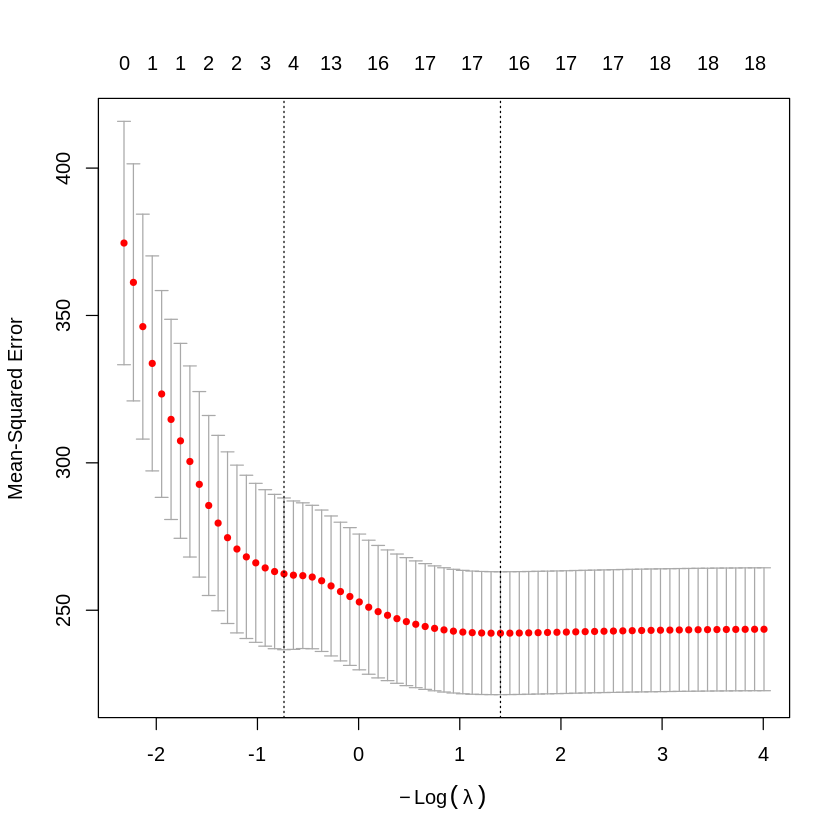

In [40]:
library(glmnet)
library(caret)
library(dplyr)
library(tibble)

# 1️⃣ Clean dataset for modeling — drop rows with missing values
model_df <- inf_env_h_reduced %>%
  drop_na(infection) %>%    # ensure infection not missing
  drop_na()                 # drop rows with any missing numeric/categorical values

# 2️⃣ Define predictors and response
#    Exclude identifiers and non-environmental columns
predictor_df <- model_df %>%
  select(
    -state, -infection, -location, -experiment, -rep,
    -tree_age, -clusters, -strikes, -rel_control
  )

# 3️⃣ Convert categorical variables into numeric dummy variables
dummy <- dummyVars("~ .", data = predictor_df)
x <- predict(dummy, newdata = predictor_df) %>% as.matrix()

# 4️⃣ Response variable
y <- model_df$infection

# 5️⃣ Sanity check
cat("Rows in X:", nrow(x), " | Length of y:", length(y), "\n")
cat("Type of X:", typeof(x), "\n")

# 6️⃣ Run LASSO (alpha = 1)
set.seed(123)
cv_lasso <- cv.glmnet(
  x, y,
  alpha = 1,
  nfolds = 10,
  standardize = TRUE
)

# 7️⃣ Summarize results
plot(cv_lasso)
cat("Lambda.min =", cv_lasso$lambda.min, "\n")
cat("Lambda.1se =", cv_lasso$lambda.1se, "\n")

# 8️⃣ Extract coefficients
coef_lasso <- coef(cv_lasso, s = "lambda.min")

# Convert sparse matrix to tidy data frame
coef_df <- as.data.frame(as.matrix(coef_lasso))
coef_df <- rownames_to_column(coef_df, "Variable")
names(coef_df)[2] <- "Coefficient"

# Keep only nonzero coefficients
nonzero_coef <- coef_df %>% filter(Coefficient != 0)

# 9️⃣ Display results
print(nonzero_coef)

# 🔟 Cross-validated R²
preds <- predict(cv_lasso, newx = x, s = "lambda.min")
r2 <- cor(y, preds)^2
cat("Cross-validated R² =", round(r2, 3), "\n")
